### Introduction
Experiment with different search algorithms and heuristics for a agent that performs progression search to solve planning problems. Use the results to answer questions about designing planning systems

### Setting up notebook to use the provided code

- Create a data class to contain our experiment data
- Modify main method from run_search.py to be able to execute from this notebook
- Modify run_search method from \_utils.py to be able to execute from this notebook

In [21]:
from dataclasses import make_dataclass
from timeit import default_timer as timer
import run_search as rs
import _utils as utils


Experiment = make_dataclass("Experiment", [("Problem_Name", str), ("Search_Algo", str), ("Heuristic", str),
                                           ("Actions", int), ("Expansions", int), ("Goal_Tests", int), ("New_Nodes", int),
                                           ("Plan_Length", int), ("Elapsed_Time", float)])

def main_modified(p_choices, s_choices):
    problems = [rs.PROBLEMS[i-1] for i in map(int, p_choices)]
    searches = [rs.SEARCHES[i-1] for i in map(int, s_choices)]

    results = [] # list of experiments
    for pname, problem_fn in problems:
        for sname, search_fn, heuristic in searches:
            problem_instance = problem_fn()
            heuristic_fn = None if not heuristic else getattr(problem_instance, heuristic)
            result = run_search_modified(problem_instance, search_fn, heuristic_fn)
            results.append(Experiment(pname, sname, heuristic, len(result[0].actions_list), 
                                      result[0].succs, result[0].goal_tests, result[0].states, result[1], result[2]))
    return results

def run_search_modified(problem, search_function, parameter=None):
    ip = utils.PrintableProblem(problem)
    start = timer()
    if parameter is not None:
        node = search_function(ip, parameter)
    else:
        node = search_function(ip)
    end = timer()
    return (ip, len(node.solution()), (end - start))


### Run searches on Cargo problems

In [12]:
all_searches = [x for x in range(1, 12)] # Used for Cargo problem 1 and 2
cargo_3_searches = [x for x in range(1, 11)] # Used for Cargo problem 3
cargo_4_searches = [x for x in range(1, 10)] # Used for Cargo problem 4

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [16]:
# Ran 1 search per cargo problem to get aa bit more feedback from the computations

# Cargo 1 problem
search_results_c1  = main_modified([1], all_searches)
df_c1 = pd.DataFrame(search_results_c1)

In [18]:
# Cargo 2 problem
search_results_c2  = main_modified([2], all_searches)
df_c2 = pd.DataFrame(search_results_c2)

In [20]:
search_results_c3  = main_modified([3], cargo_3_searches)
df_c3 = pd.DataFrame(search_results_c3)

In [27]:
search_results_c4  = main_modified([4], cargo_4_searches)
df_c4 = pd.DataFrame(search_results_c4)

#### Combine the dataframe

In [54]:
df_combined = pd.concat([df_c1, df_c2, df_c3, df_c4]) 

In [55]:
df_combined = df_combined.set_index(["Problem_Name", "Search_Algo"])
df_combined

Heuristic  Actions  \
Problem_Name        Search_Algo                                              
Air Cargo Problem 1 breadth_first_search                                20   
                    depth_first_graph_search                            20   
                    uniform_cost_search                                 20   
                    greedy_best_first_graph_search  h_unmet_goals       20   
                    greedy_best_first_graph_search  h_pg_levelsum       20   
                    greedy_best_first_graph_search  h_pg_maxlevel       20   
                    greedy_best_first_graph_search  h_pg_setlevel       20   
                    astar_search                    h_unmet_goals       20   
                    astar_search                    h_pg_levelsum       20   
                    astar_search                    h_pg_maxlevel       20   
                    astar_search                    h_pg_setlevel       20   
Air Cargo Problem 2 breadth_first_search                                72   
                    depth_first_graph_search                            72   
                    uniform_cost_search                                 72   
                    greedy_best_first_graph_search  h_unmet_goals       72   
                    greedy_best_first_graph_search  h_pg_levelsum       72   
                    greedy_best_first_graph_search  h_pg_maxlevel       72   
                    greedy_best_first_graph_search  h_pg_setlevel       72   
                    astar_search                    h_unmet_goals       72   
                    astar_search                    h_pg_levelsum       72   
                    astar_search                    h_pg_maxlevel       72   
                    astar_search                    h_pg_setlevel       72   
Air Cargo Problem 3 breadth_first_search                                88   
                    depth_first_graph_search                            88   
                    uniform_cost_search                                 88   
                    greedy_best_first_graph_search  h_unmet_goals       88   
                    greedy_best_first_graph_search  h_pg_levelsum       88   
                    greedy_best_first_graph_search  h_pg_maxlevel       88   
                    greedy_best_first_graph_search  h_pg_setlevel       88   
                    astar_search                    h_unmet_goals       88   
                    astar_search                    h_pg_levelsum       88   
                    astar_search                    h_pg_maxlevel       88   
Air Cargo Problem 4 breadth_first_search                               104   
                    depth_first_graph_search                           104   
                    uniform_cost_search                                104   
                    greedy_best_first_graph_search  h_unmet_goals      104   
                    greedy_best_first_graph_search  h_pg_levelsum      104   
                    greedy_best_first_graph_search  h_pg_maxlevel      104   
                    greedy_best_first_graph_search  h_pg_setlevel      104   
                    astar_search                    h_unmet_goals      104   
                    astar_search                    h_pg_levelsum      104   

                                                    Expansions  Goal_Tests  \
Problem_Name        Search_Algo                                              
Air Cargo Problem 1 breadth_first_search                    43          56   
                    depth_first_graph_search                21          22   
                    uniform_cost_search                     60          62   
                    greedy_best_first_graph_search           7           9   
                    greedy_best_first_graph_search           6           8   
                    greedy_best_first_graph_search           6           8   
                    greedy_best_first_graph_search           6           8   

### Analyze the search complexity as a function of domain size, search algorithm, and heuristic.

- Analyze the number of nodes expanded against number of actions in the domain.


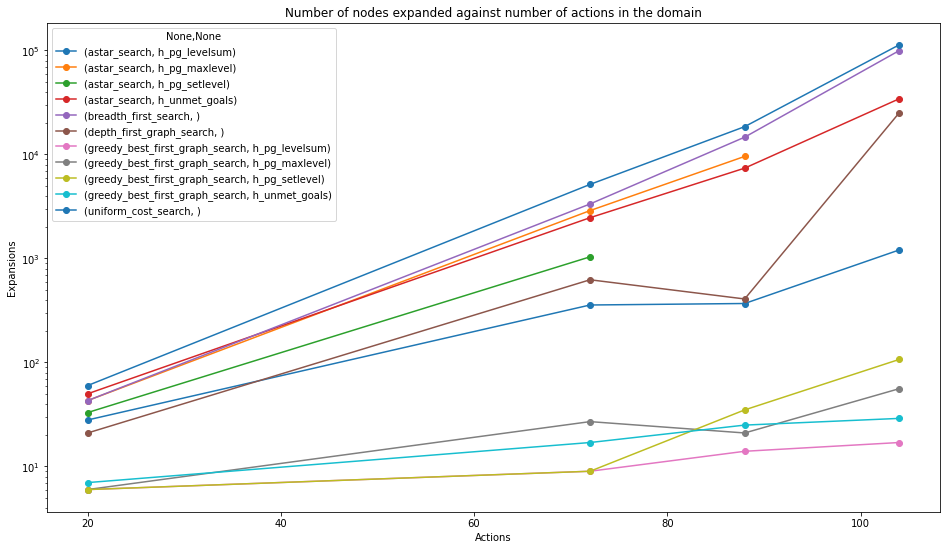

In [124]:
import matplotlib.pyplot as plt

df_plot = df_combined.reset_index()
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Expansions'].plot(ylabel='Expansions', legend=True, marker='o',
                                                                 figsize=(16,9), logy=True,
                                                                 title='Number of nodes expanded against number of actions in the domain')
plt.show()

#### Discussion of results:
bla bla

### Analyze search time as a function of domain size, search algorithm, and heuristic.

- Analyze the search time against the number of actions in the domain.

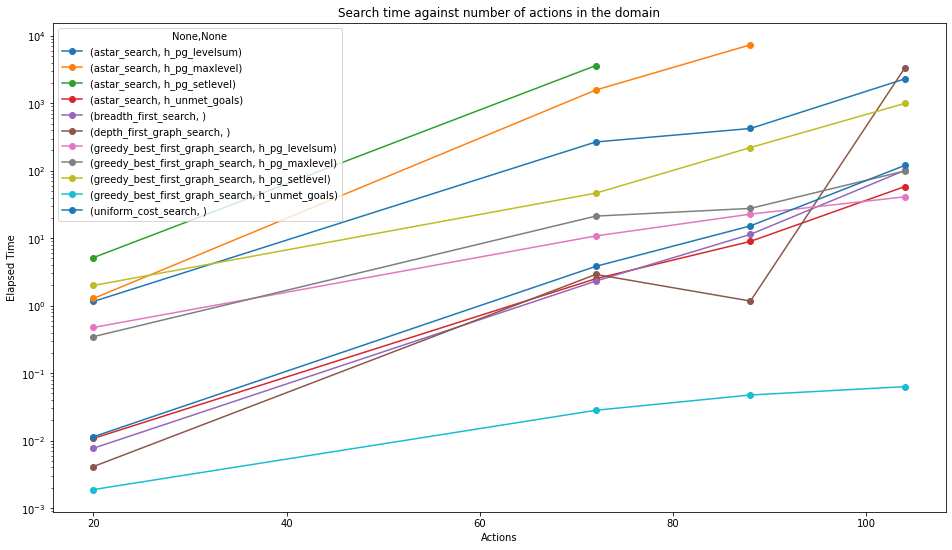

In [129]:
import matplotlib.pyplot as plt

df_plot = df_combined.reset_index()
df_plot = df_plot.set_index('Actions', inplace=False)
df_plot.groupby(['Search_Algo', 'Heuristic'])['Elapsed_Time'].plot(ylabel='Elapsed Time', legend=True, marker='o',
                                                                 figsize=(16,9), logy=True,
                                                                 title='Search time against number of actions in the domain')
plt.show()

#### Discussion of results:
bla bla